<h1 align="center" style="color: firebrick;"> Empowering Student Success Through Data </h1>
<img src= "proj.jpg" width="1400">

<h2 align="center" style="color: firebrick; font-weight: bold;"> Project Overview </h2>
<img src= "img3.jpg" width="1400">

<b> A school is taking the data driven initiative approach to resolve - the difficulty in ensuring equitable education and meeting each student’s unique academic needs effectively.</b>


## As a Data Analyst, my goal for this project is twofold 
- Ensure that students who have previously struggled or failed are able to meet the minimum passing criteria.
- Elevate overall academic performance by helping students improve their grades incrementally

Through targeted analysis and insights, I aim to drive meaningful improvements in student outcomes, supporting both baseline achievement and excellence.

<img src= "img2.jpg" width="1400">

<b>As a data analyst, I have developed this project in Power BI, showcasing the dashboard to provide insights. 

<img src= "https://i.imgur.com/kqs4J07.jpeg" width="1400">

<b> Moving forward, I plan to extend the analysis using Python to dive deeper into the data and uncover further actionable insights.</b>

In [1]:
import os
import requests
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display


In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df2=pd.read_csv("StudentsPerformance.csv")

## EXPLORATORY DATA ANALYSIS 
- Checking the dataset (# Rows & # Columns)
- Dataset Information (Checking for features & Null values)
- Reading the first 5 rows
- Describe Dataset ( To check the mean, minimum & maximum values)
- Number of Columns


In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br><br>
- There are 1000 Rows and 8 Columns in this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div>
- The dataset looks good with no null values<br>
- Dataset contains 8 features<br>
- only 3 columns recording the scores are of numerical values (integer type)<br>
- all other columns have categorical values that is of class object type<br>

In [6]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div>
- The total count is 1000 records<br>
- For mathsscore , some students have scored as low as 0 <br>
- There are students who have outperformed with a max score of 100 <br>
- Average value for all subjects are in range of 60's<br>
- 25th percentile of the class score fall in 57 and above category<br>
- 75th percentile of the class have scored 77 and above

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<B> DEVELOPING NEW FEATURES TO SUPPORT OUR PROJECT GOALS </B>
- Classifying students who Passed /Failed and their relevant grades
- Overall Percentage
- Total Score
- Competent/Incompetent

In [9]:
df['Total'] = (df['math score']+df['reading score']+df['writing score'])
df['Percentage'] = ((df['math score']+df['reading score']+df['writing score'])/3).round(2) # rounded to 2 decimal places

### We classify the students based on their grades as stated below  <br>
<img src= "gs_cp.jpg" width="500">

In [10]:
def Grade(Percentage):
    if Percentage >= 95:
        return 'O'
    elif Percentage >= 81:
        return 'A'
    elif Percentage >= 71:
        return 'B'
    elif Percentage >= 61:
        return 'C'
    elif Percentage >= 51:
        return 'D'
    elif Percentage >= 41:
        return 'E'
    else:
        return 'F'
df["Grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)     

In [11]:
#df.drop('grade', axis=1, inplace=True)

<B> We classify if the students are Competent/Incompetent (pass/fail)

In [12]:
def Competent(Grade):
    if Grade == 'F':  
        return 0
    else:
        return 1
    
df["Competent"] = df.apply(lambda y: Competent(y["Grade"]), axis=1) 

In [13]:
def Result(Competent):
    if Competent == 0:  
        return 'Incompetent'
    else:
        return 'Competent'
    
df["Result"] = df.apply(lambda z: Result(z["Competent"]), axis=1) 

In [14]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Percentage,Grade,Competent,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,B,1,Competent
1,female,group C,some college,standard,completed,69,90,88,247,82.33,A,1,Competent
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,A,1,Competent
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,E,1,Competent
4,male,group C,some college,standard,none,76,78,75,229,76.33,B,1,Competent


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total                        1000 non-null   int64  
 9   Percentage                   1000 non-null   float64
 10  Grade                        1000 non-null   object 
 11  Competent                    1000 non-null   int64  
 12  Result                       1000 non-null   object 
dtypes: float64(1), int6

<B> Additional Analysis that we can infer from this dataset :-) </B>
- Identifying the subjects where students show the lowest performance.

In [16]:
print(f"Average Math score is       : {df['math score'].mean()}")
print(f"Average Reading score is    : {df['reading score'].mean()}")
print(f"Average Writing score is    : {df['writing score'].mean()}")
print(f"Average Total score is      : {df['Total'].mean()}")

Average Math score is       : 66.089
Average Reading score is    : 69.169
Average Writing score is    : 68.054
Average Total score is      : 203.312


<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br><br>
- Overall Performance of students in Maths is the lowest compared to Reading & writing

<B> Violinplot to visualize this observation </B>

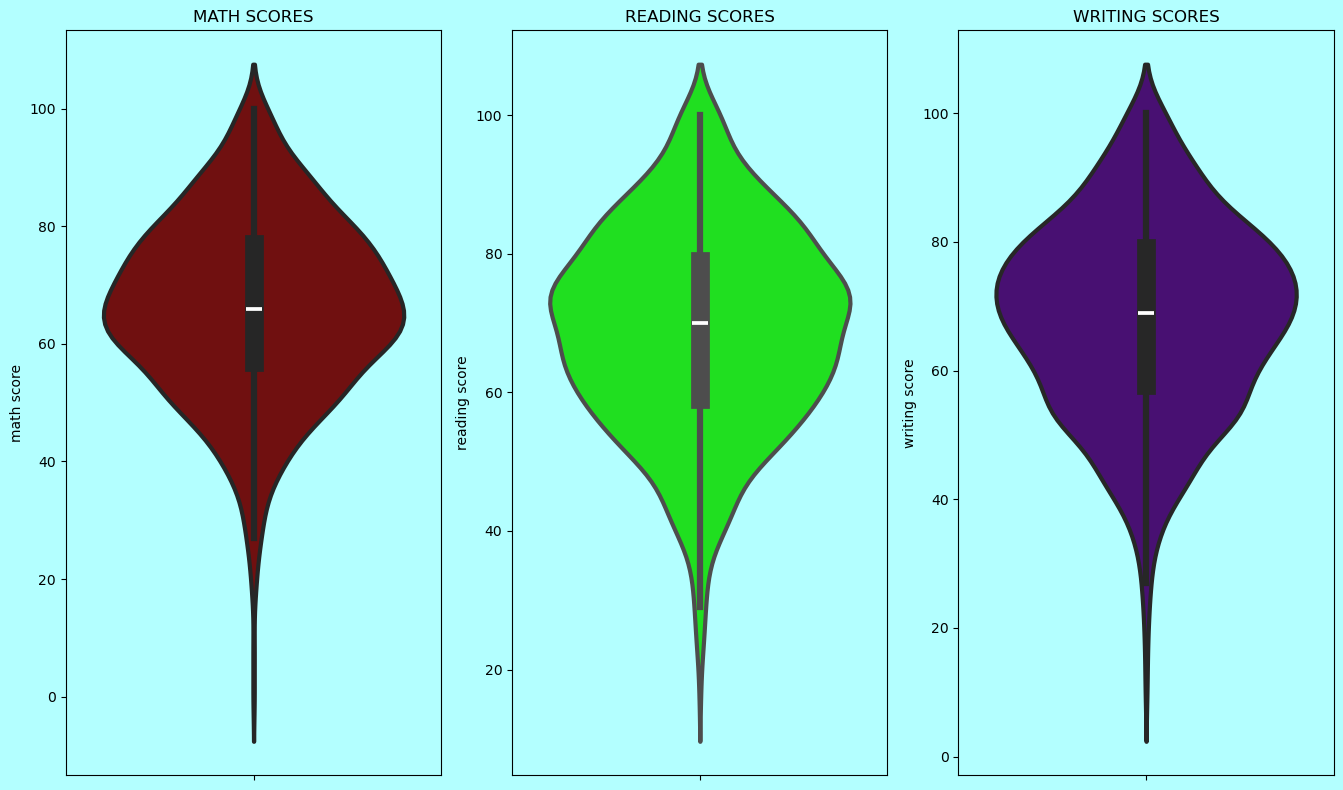

In [17]:
plt.rcParams['axes.facecolor'] = "#b3ffff"
plt.rcParams['figure.facecolor'] ="#b3ffff"
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='maroon',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='lime',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='indigo',linewidth=3)
plt.tight_layout()
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- Most of the students have scored a range of 60-70 in Maths<br>
- Whereas Most Students have scored in a range of 70-80 for reading and writing subjects

<b> <font color="firebrick"> BREAKDOWN ANALYSIS FOR CRITERIA 1 (SECURING A MINIMUM PASS)</font>

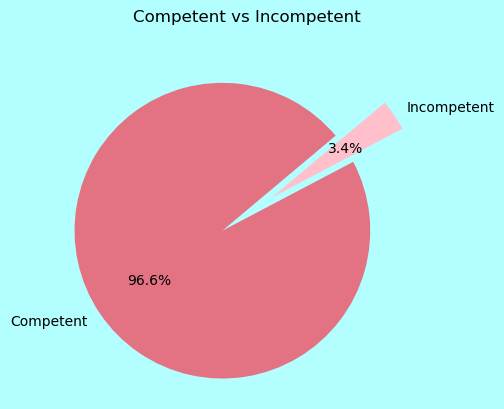

34


In [18]:
# Pie chart: Create a count of 'Competent' vs 'Incompetent'
competent_count = df['Competent'].value_counts()

# Assign labels: 0 = Incompetent, 1 = Competent
labels = ['Competent', 'Incompetent']

# Create pie chart for the second subplot
plt.pie(competent_count, labels=labels, autopct='%1.1f%%', colors=['#E37383','#FFC0CB'],startangle=40, explode=[0.2,0.2])
plt.title('Competent vs Incompetent')
plt.show()

df['Competent'].sum()
total_failed = 1000 - df['Competent'].sum()
print(total_failed)

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
        - 96.6% of the total students have Passed the exam and have been marked Competent<br>
        - Out of 1000 Students who have attempted the examination 34 students have failed the examination

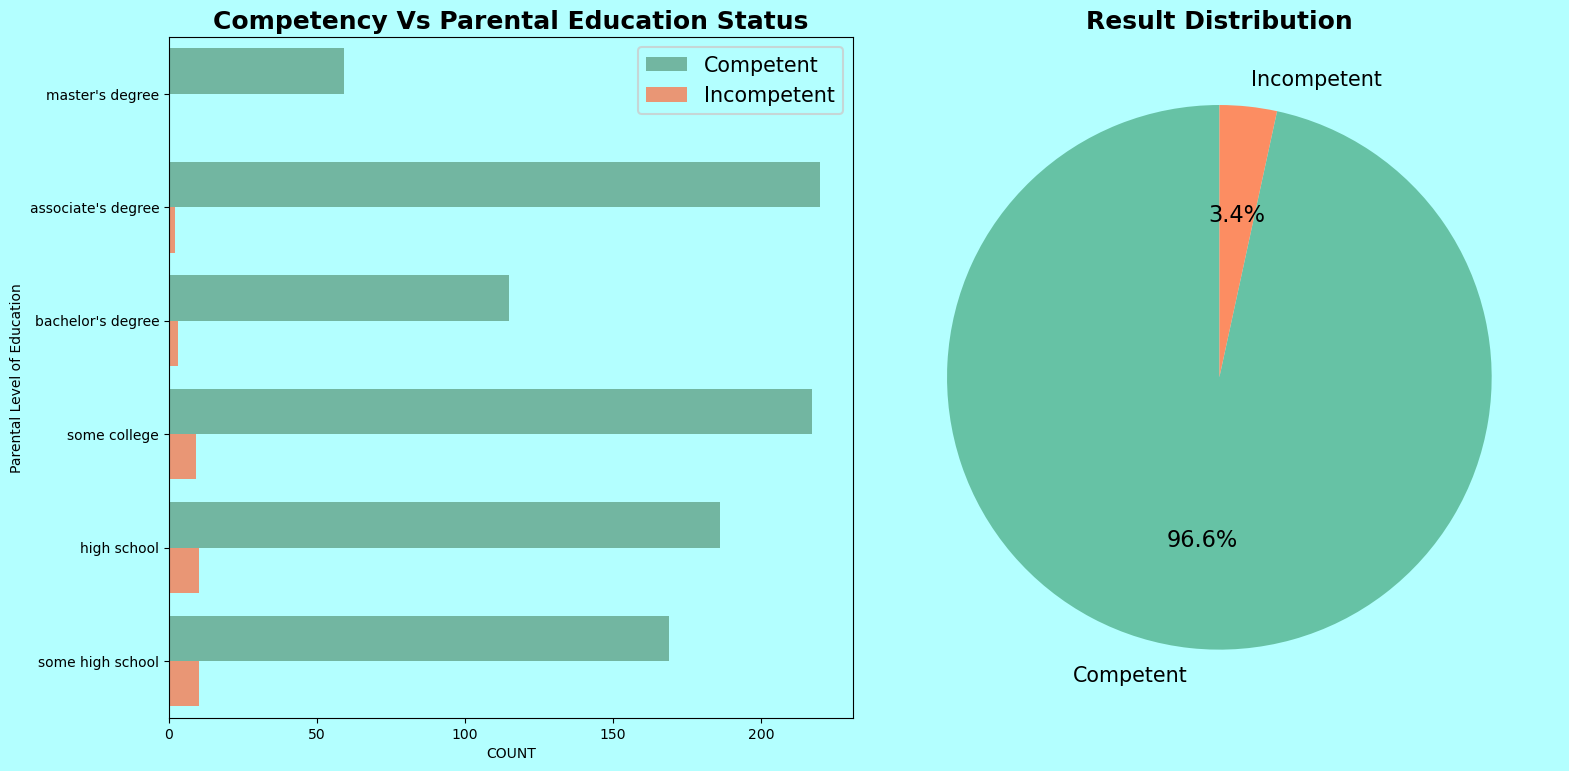

In [19]:
# Create subplots (1 row, 2 columns)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs = axs.flatten()  # Flatten the axs array to simplify access to individual axes

# Plot 1: Countplot (your original plot)
sns.set_context("talk", font_scale=0.9)
#sns.set_palette("muted")  # You can change this to any palette like "pastel", "deep", etc.
colors = sns.color_palette("Set2", 2)  # Choose a color palette (matching the pie chart)

# Creating the first countplot on axs[0]
#sns.countplot(y="parental level of education", hue="Result", data=df, 
#             order=["master's degree", "associate's degree", "bachelor's degree", 
#                     "some college", "high school"], ax=axs[0])
sns.countplot(y="parental level of education", hue="Result", data=df, 
              order=["master's degree", "associate's degree", "bachelor's degree", 
                     "some college", "high school","some high school"], ax=axs[0], palette=colors)

# Customizing the first plot (Plot 1)
axs[0].set_title('Competency Vs Parental Education Status', fontsize=18, fontweight='bold')
axs[0].set(xlabel='COUNT', ylabel='Parental Level of Education')
axs[0].legend(loc='upper right', frameon=True)

# Plot 2: Pie chart (Result distribution for a specific "parental level of education")
result_counts = df['Result'].value_counts()  # Get the count of each result category
labels = result_counts.index  # The categories (e.g., 'Pass', 'Fail')
sizes = result_counts.values  # The actual counts
colors = sns.color_palette("Set2", len(labels))  # Choose a palette for the pie chart

# Creating the pie chart on axs[1]
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Customizing the pie chart (Plot 2)
axs[1].set_title('Result Distribution', fontsize=18, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- 'high school' & 'some high school' should be grouped as one category<br>
- I combine them and re-plot the graph for better analysis

In [20]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [21]:
df['parental level of education'] = df['parental level of education'].replace("some high school", "high school")
df['parental level of education'].value_counts()

parental level of education
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

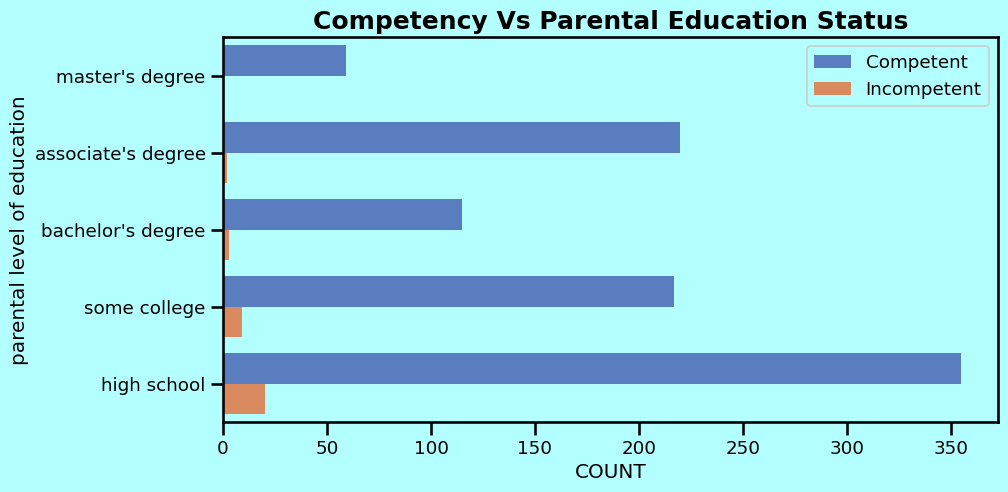

In [22]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=0.8)
sns.set_palette("muted")
ax = sns.countplot(y="parental level of education", hue="Result", data=df, order=["master's degree","associate's degree","bachelor's degree","some college","high school"])
ax.legend(loc='upper right',frameon=True)
plt.title('Competency Vs Parental Education Status', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='parental level of education')
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- All students whose parents have a master's degree are classified as competent (not a single incompetent).<br>
- Students with parents who have a associate's/bachelor's degree show a high proportion of competent students, though some incompetent students are also present.<br>
- Gradually see an increase for incompetent students wherein parents with some college qualification followed by parents with high school<br>
- Based on data analysis Parent's qualification <b>does</b> have an impact on the student's perfomance.<br>


### Creating additional feature to classify parents with/without a degree for a crisp view

In [23]:
def Degree_holder(education):
    degree_holders = ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree'] 
    if education in degree_holders:
        return 'Degree Holder'
    else:
        return 'NON Degree Holder'
df["Degree_holder"] = df.apply(lambda z: Degree_holder(z["parental level of education"]), axis=1) 

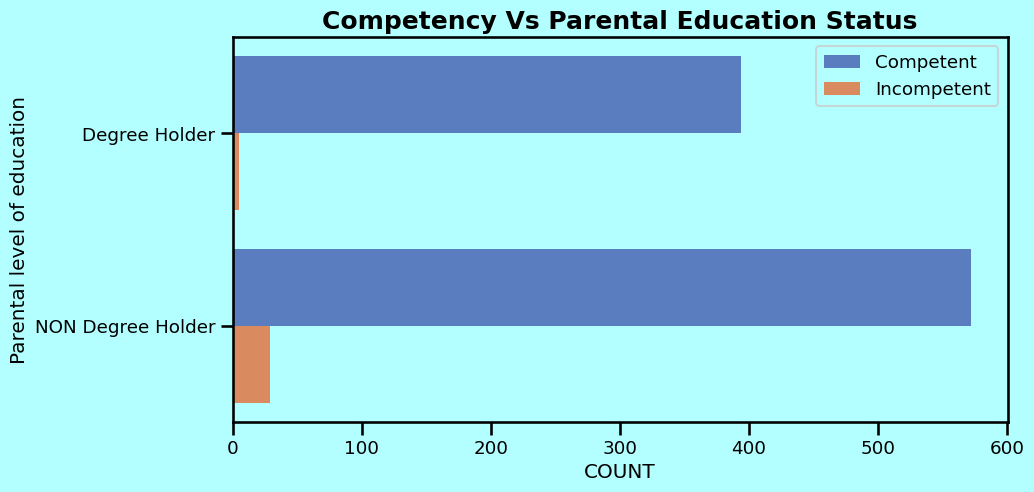

In [24]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=0.8)
sns.set_palette("muted")
ax = sns.countplot(y="Degree_holder", hue="Result", data=df, order=["Degree Holder","NON Degree Holder"])
ax.legend(loc='upper right',frameon=True)
plt.title('Competency Vs Parental Education Status', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='Parental level of education')
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br><br>
- A significant portion of incompetent students comes from households where parents do not hold a degree.

### CONCLUSION/SOLUTION BASED ON DATA ANALYSIS FOR CRITERIA 1 (ACHEIVING A MINIMUM PASS) 
<div style="display: flex; align-items: flex-start;">
    <div>
        <p><li> Analysis shows that almost all of the students - with parents holding a degree or higher qualifications have a PASS. </li></p>
        <p><li> Students whose parents lack formal degree qualifications may benefit from being in a class that provides extra practice and focused coaching, helping them succeed even without potential support from home.</li></p>
    </div>
        <img src="img5.jpg" width="250" style="margin-left: 20px;"> 
     </div>


<b> <font color="firebrick"> FURTHER ANALYSIS TO SOLVE CRITERIA 2 (IMPROVING GRADES)</font><br>




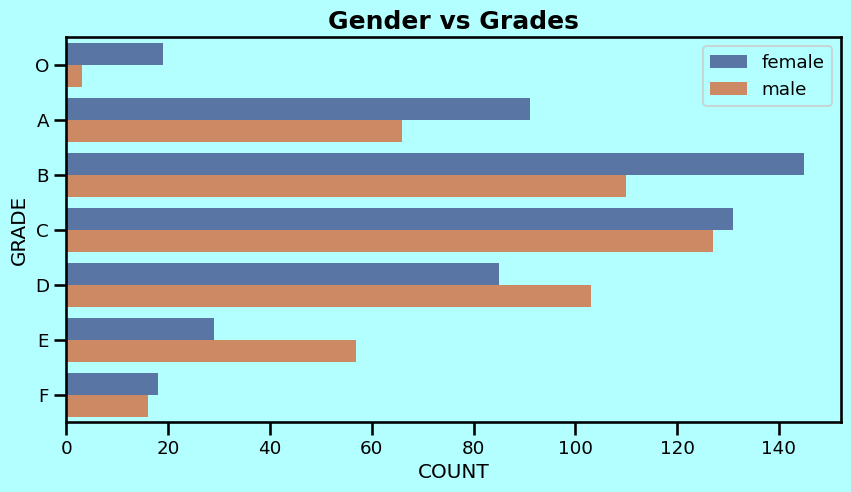

In [25]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=0.8)
sns.set_palette("deep")
ax = sns.countplot(y="Grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- The Females have performed better than Males<br>
- Most of the Females have an outstanding performance compared to Males, same is the case for Grades A and B as well<br>

<b> Additional Analysis using pairplot </b>
- Lets see who Scored better Girls/Boys

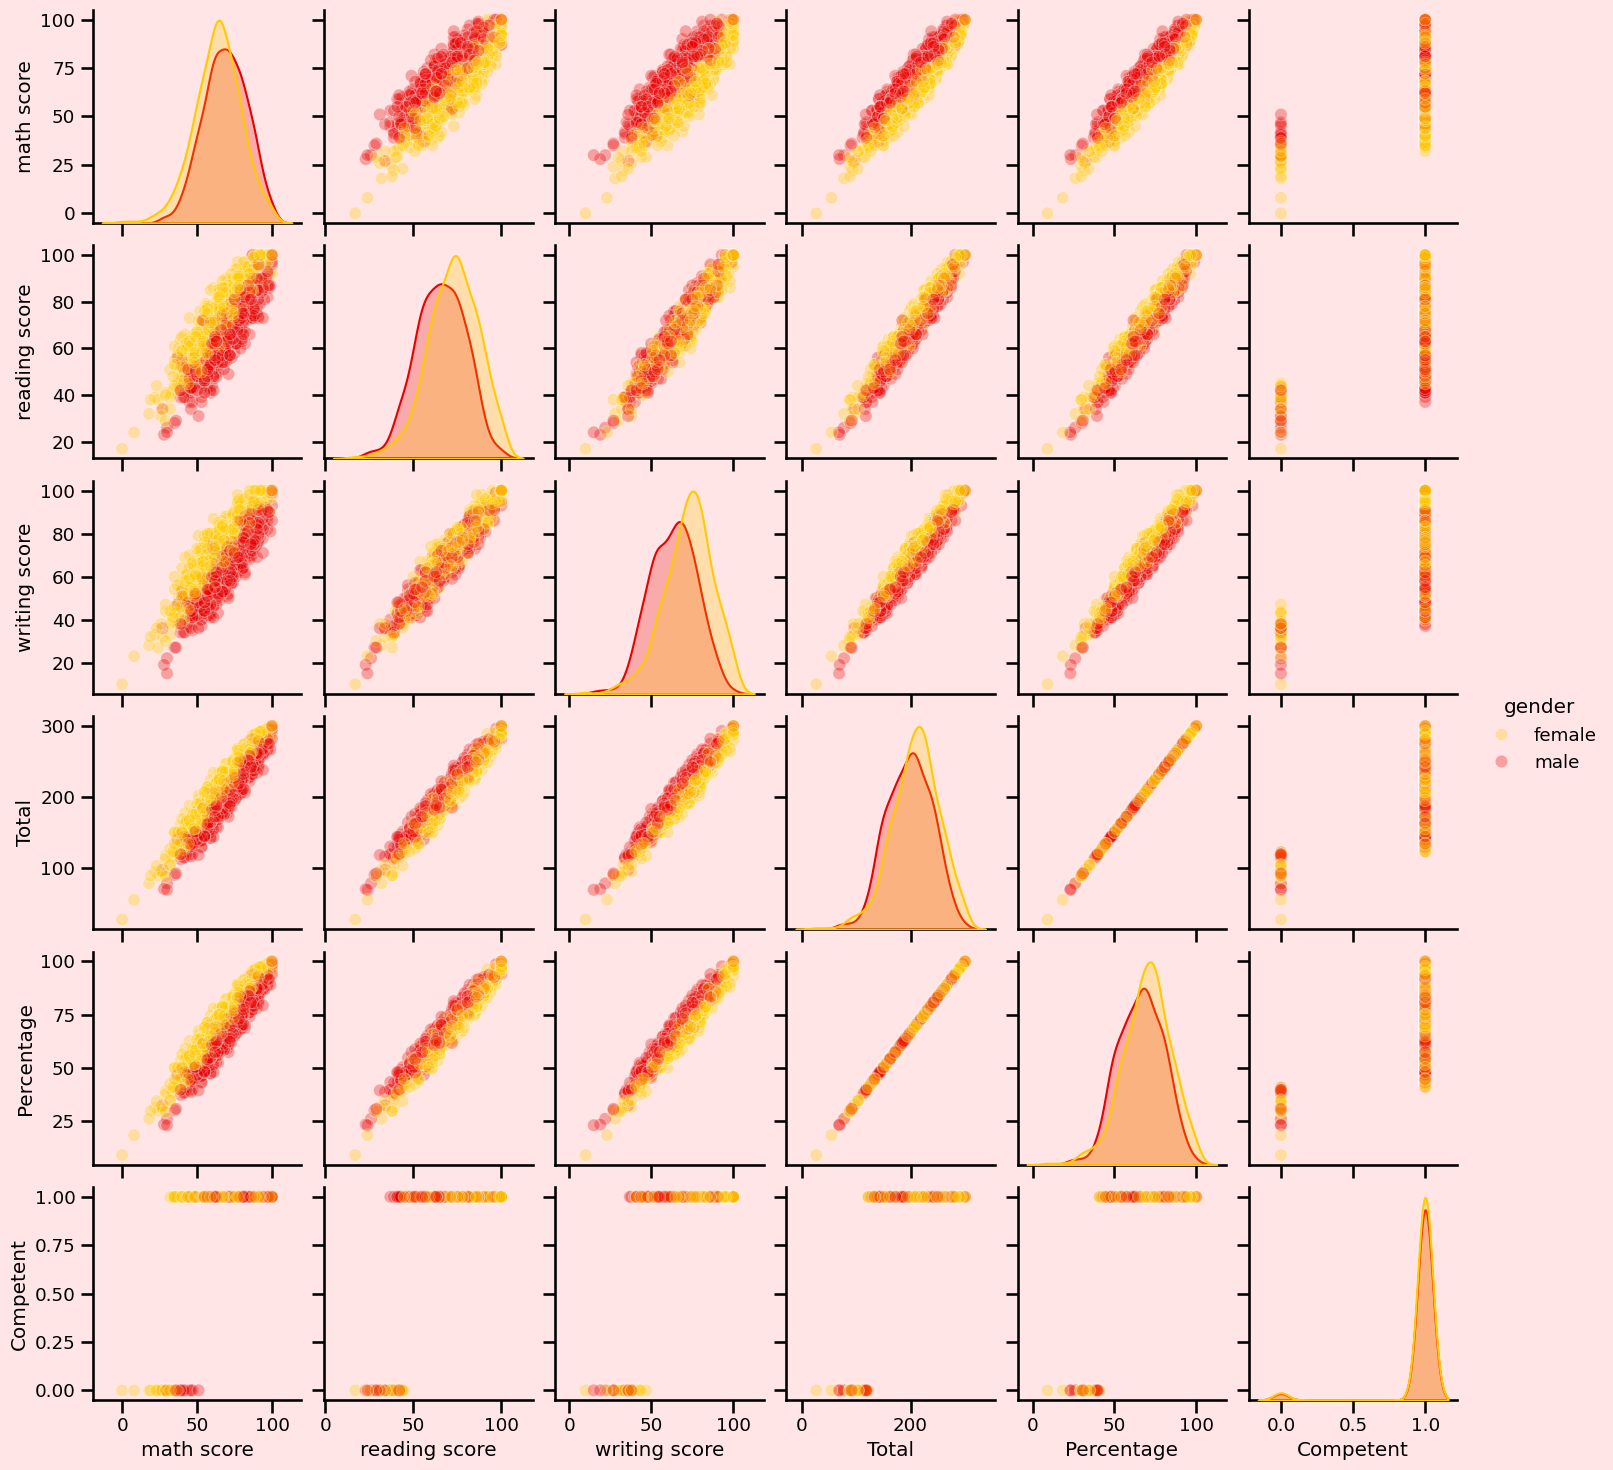

In [28]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.3},palette='hot_r')

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- Females consistently achieved higher scores than males in reading and writing.<br>
- Males, on the other hand, excelled in mathematics, outperforming females in this subject area.<br>
- To conclude for a Teacher this Analysis isn't as much beneficial to improve grades so let's explore the data further from another angle

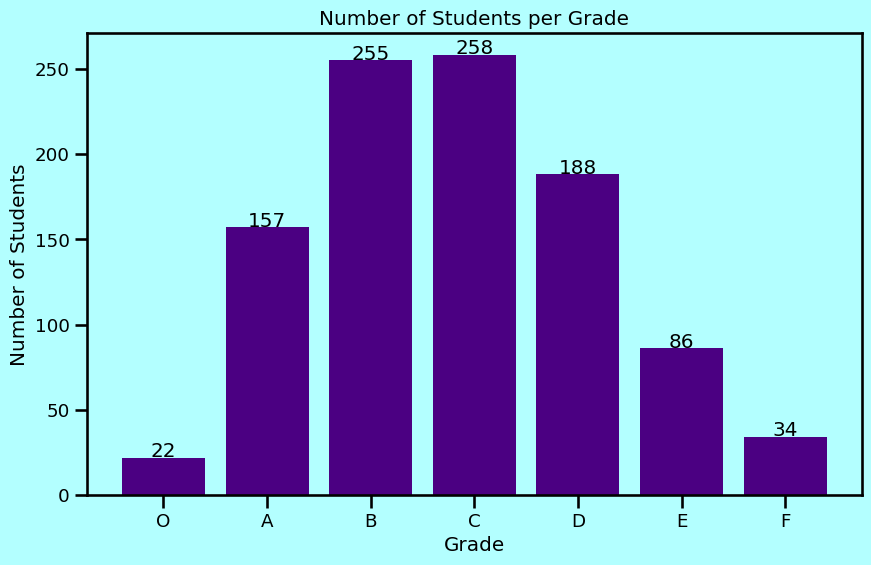

In [26]:
# Finding the Total students with relevant grades
grade_counts = df['Grade'].value_counts().sort_index()
grade_counts = grade_counts.reindex(['O', 'A', 'B', 'C', 'D', 'E', 'F'], fill_value=0)
# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(grade_counts.index, grade_counts.values, color='indigo')

# Adding data labels on top of each bar
[plt.text(i, v + 0.5, str(v), ha='center') for i, v in zip(grade_counts.index, grade_counts.values)]

# Adding titles and labels
plt.title('Number of Students per Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

# Display the plot
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- Most of the students have scored either Grade B or Grade C<br>
- Close to 25 students have given an outstanding performance<br>
- More than 150 Students have scored an A

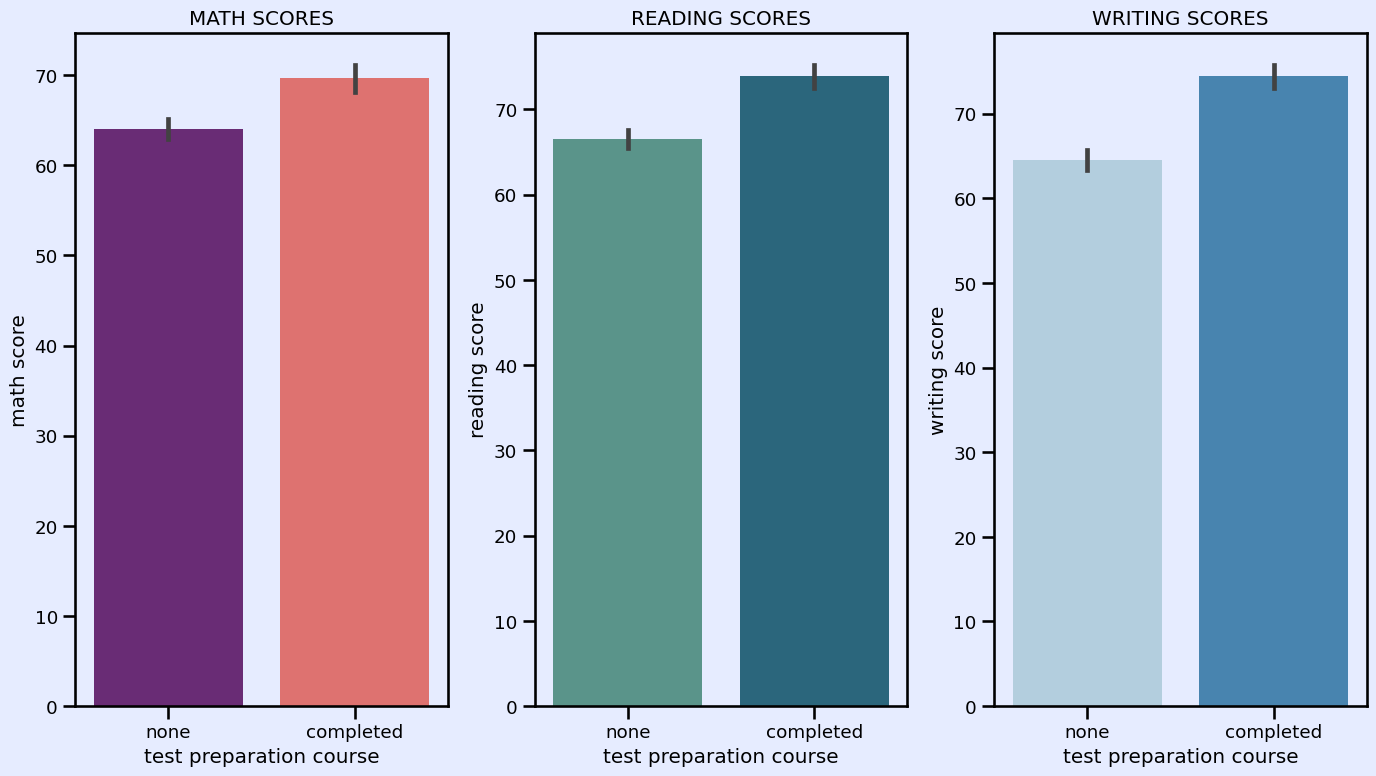

In [27]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14, 8))

# Subplot for Math Scores, comparing test preparation course
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course', y='math score', data=df,  hue='test preparation course', palette='magma')
plt.title('MATH SCORES')

# Subplot for Reading Scores, comparing test preparation course
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course', y='reading score', data=df, hue='test preparation course', palette='crest')
plt.title('READING SCORES')

# Subplot for Writing Scores, comparing test preparation course
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course', y='writing score', data=df, hue='test preparation course', palette='Blues')
plt.title('WRITING SCORES')

plt.tight_layout()
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- Generally Students who completed the 'test preparation course' consistently outperformed those who did none for all three assessments

<B> Generating heatmaps to understand the correlation of different features

In [29]:
#df_encoded = pd.get_dummies(df, drop_first=True) # dummies is encoding categorical variables into numerical format using one-hot encoding(0/1)

In [30]:
df_clean1 = df.drop(columns=['Result', 'parental level of education', 'Competent', 'Total', 'gender','math score','reading score','writing score','Grade'])
df_encoded = pd.get_dummies(df_clean1, drop_first=True) # dummies is encoding categorical variables into numerical format using one-hot encoding(0/1)

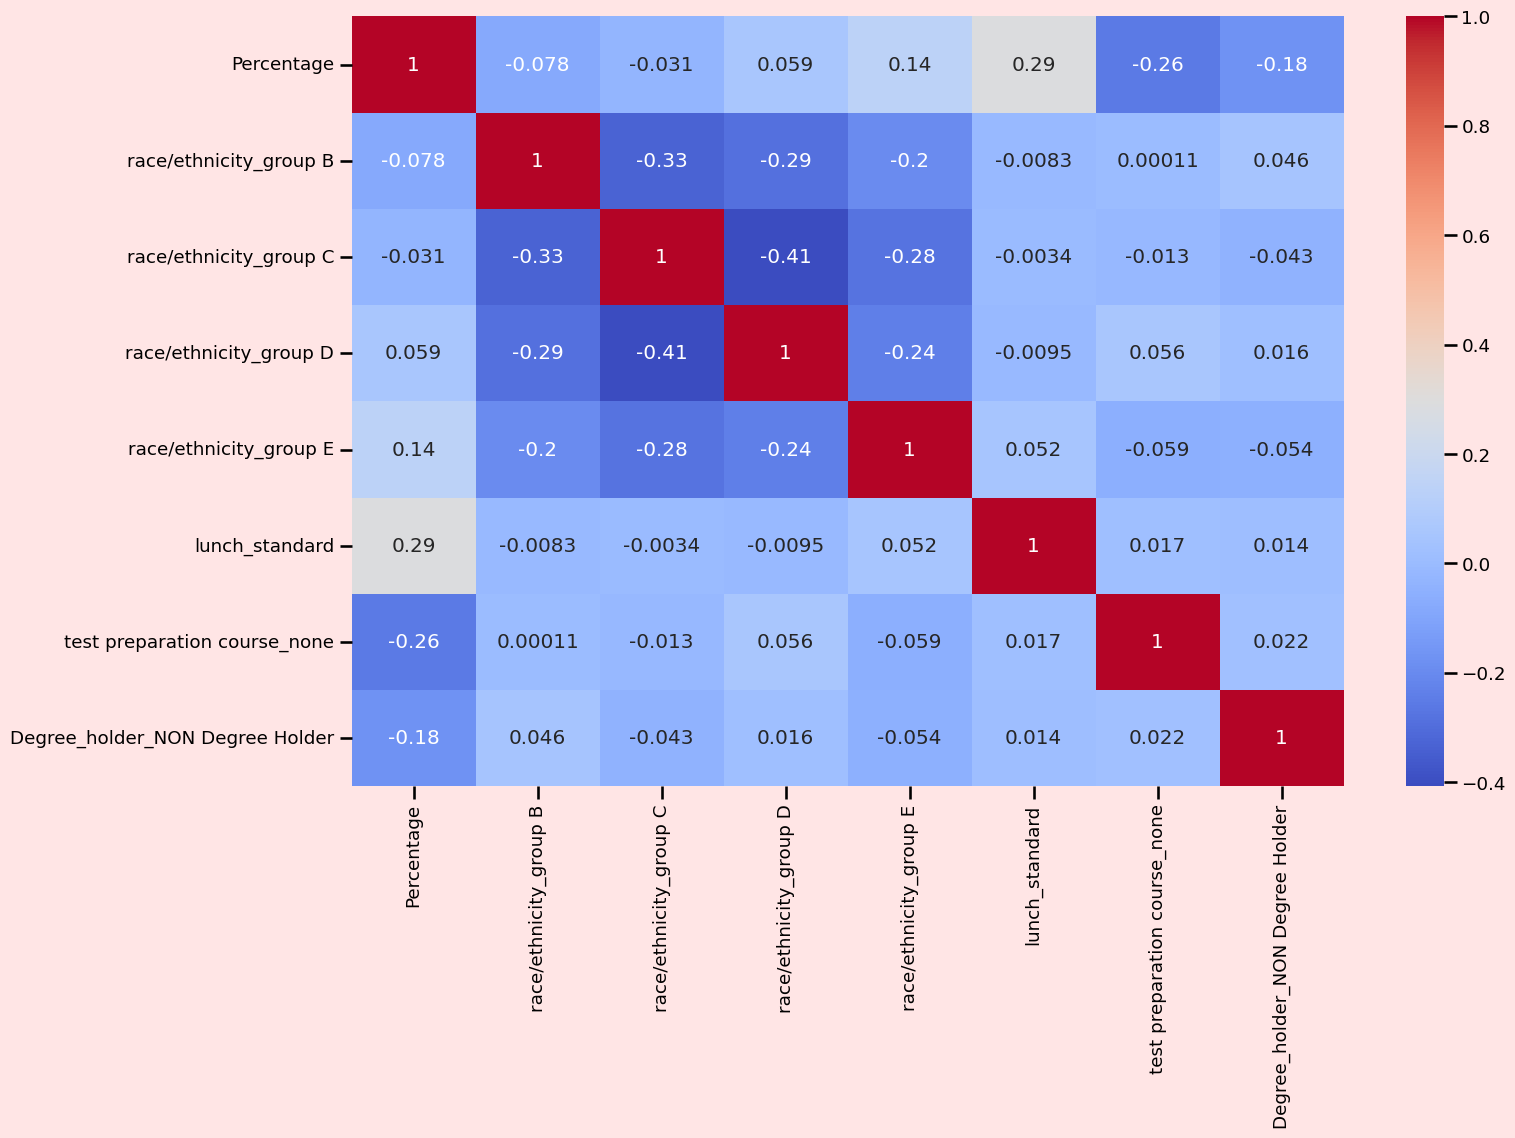

In [31]:
#df_drop = df_encoded.drop(columns=['Percentage','math score','reading score','writing score'])
fig=plt.figure(figsize=(16,10))
corrdf = df_encoded.corr()
sns.heatmap(corrdf, annot=True, cmap="coolwarm")
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- Did not have clear picture since to too many features displayed onto one heatmap, somehow Race group D have a better correlation , although not conclusive

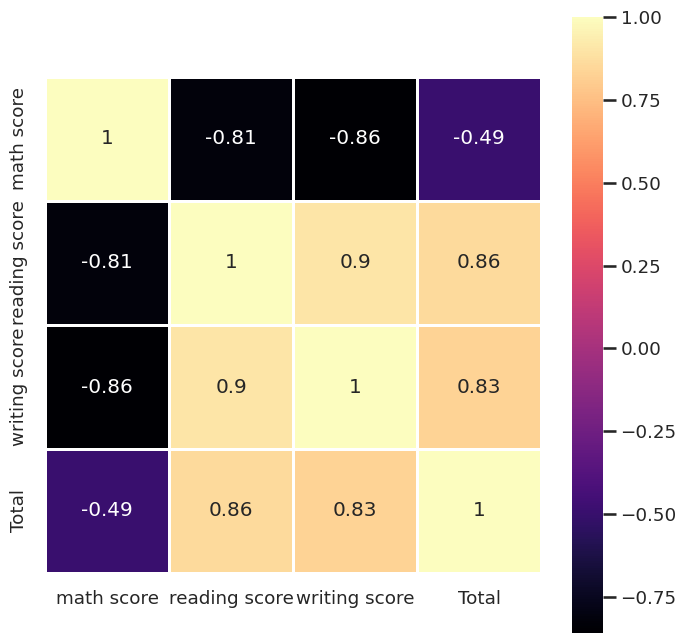

In [32]:
df_clean = df.drop(columns=['Result', 'Degree_holder', 'Competent', 'Percentage', 'gender'])

# Ensure 'Grade' is included in the dataframe for correlation calculation
# Calculate the correlation matrix including 'Grade' and other  columns (race, lunch,degreeholder,test preparation)
corrdf = df_clean.select_dtypes(include=[np.number]).corr()
corr = corrdf.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    #ax = sns.heatmap(corr, mask=mask, square=True,linewidths=.8,cmap="autumn",annot=True) # if want to whiten up the corners
    ax = sns.heatmap(corr,square=True,linewidths=.8,cmap="magma",annot=True)

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div><br>
- `Writing_score` and `reading_score` are also highly correlated (0.9) which tells us that if a student reads well then he/she also writes well.<br>
- `Math_score` doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa

<b> Summary of Potential Featuers Cross-Relations:</b>  
•	Gender vs. Scores (Math, Reading, Writing)  
•	Parental Education vs. Scores  
•	Lunch Type vs. Scores  
•	Test Preparation Course vs. Scores  
•	Race/Ethnicity vs. Scores  

<b> Generating boxplots to visualize the above relationships

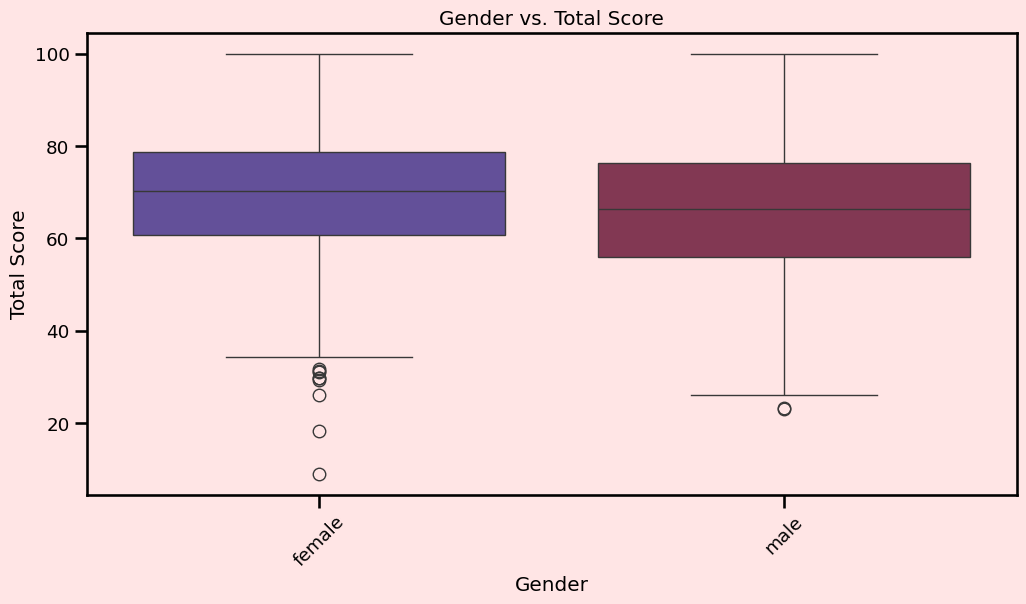

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='Percentage', palette='twilight')
plt.xticks(rotation=45)
plt.title("Gender vs. Total Score")
plt.xlabel("Gender")
plt.ylabel("Total Score")
plt.show()

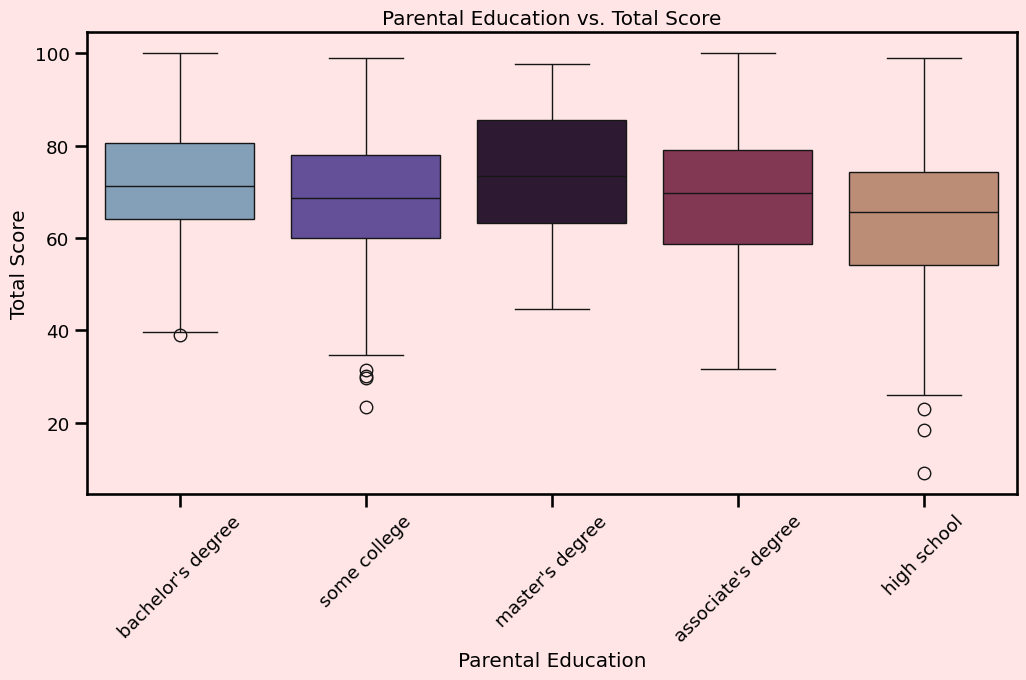

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='parental level of education', y='Percentage', palette='twilight')
plt.xticks(rotation=45)
plt.title("Parental Education vs. Total Score")
plt.xlabel("Parental Education")
plt.ylabel("Total Score")
plt.show()

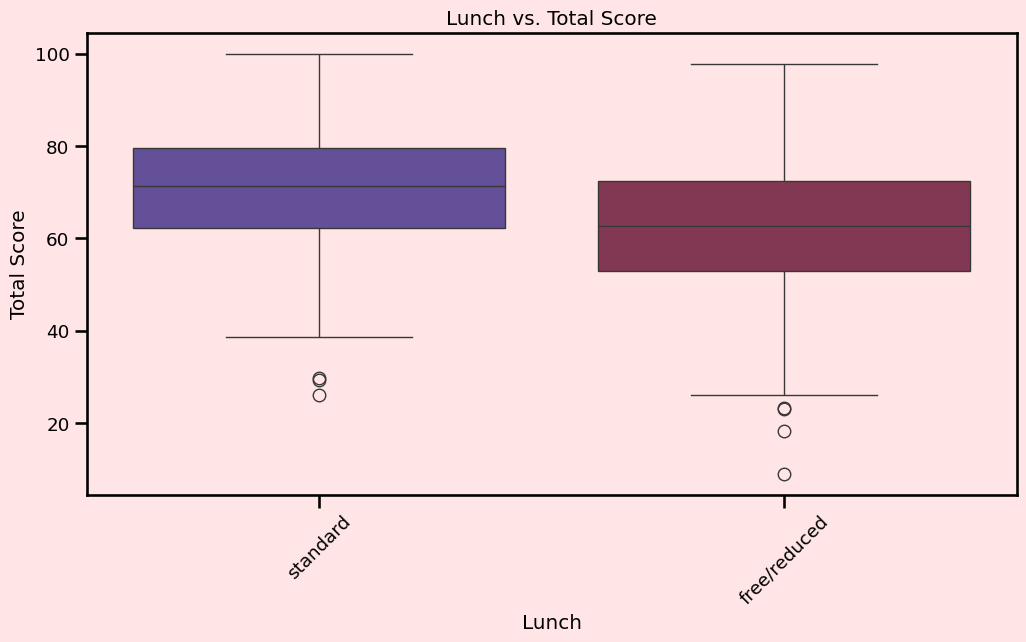

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='lunch', y='Percentage', palette='twilight')
plt.xticks(rotation=45)
plt.title("Lunch vs. Total Score")
plt.xlabel("Lunch")
plt.ylabel("Total Score")
plt.show()

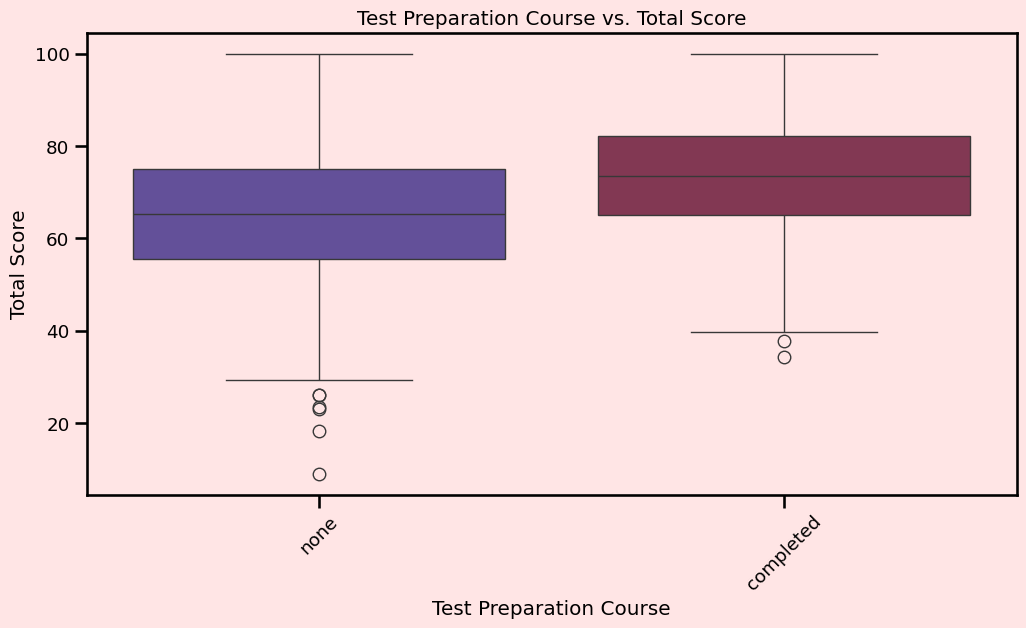

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='test preparation course', y='Percentage', palette='twilight')
plt.xticks(rotation=45)
plt.title("Test Preparation Course vs. Total Score")
plt.xlabel("Test Preparation Course")
plt.ylabel("Total Score")
plt.show()

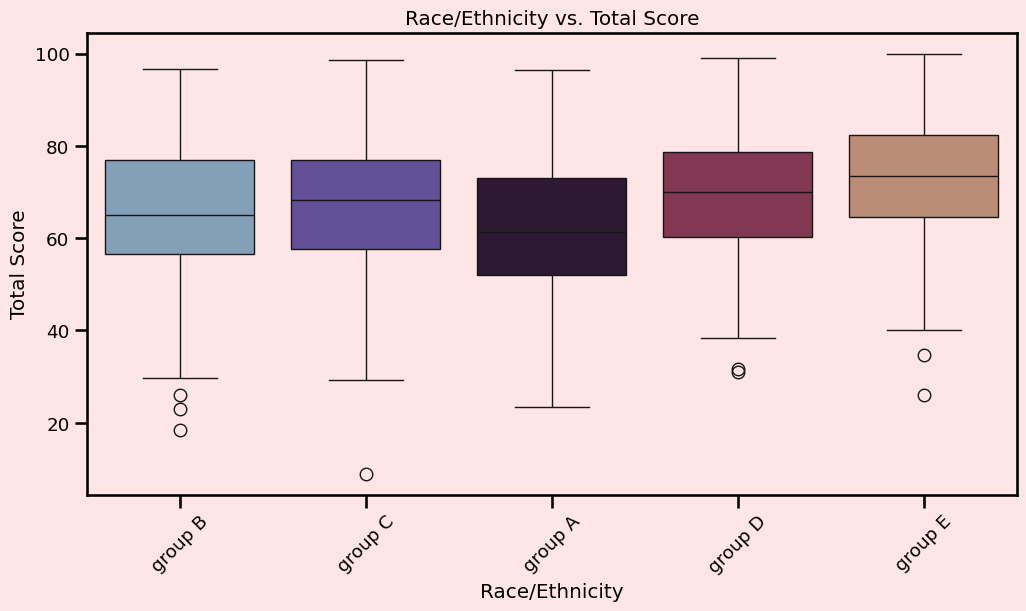

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='race/ethnicity', y='Percentage', palette='twilight')
plt.xticks(rotation=45)
plt.title("Race/Ethnicity vs. Total Score")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Total Score")
plt.show()

## Combining the visualization into one plot

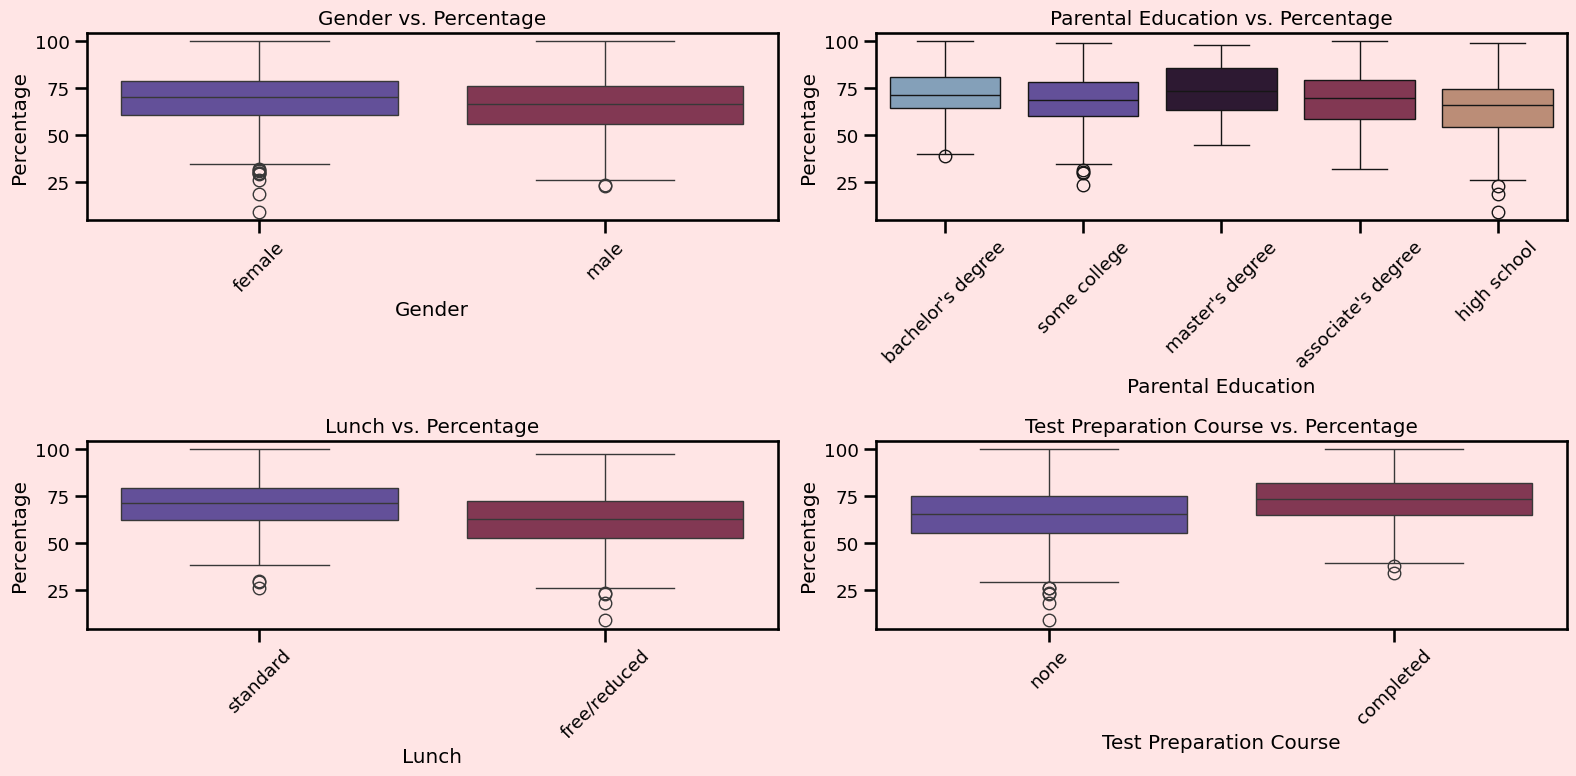

In [38]:
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create subplots (2 rows, 2 columns)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axs = axs.flatten()  # Flatten the axs array to simplify access to individual axes

# --- Plot 1: Boxplot for Gender vs Percentage ---
sns.boxplot(data=df, x='gender', y='Percentage', palette='twilight', ax=axs[0])
axs[0].set_title("Gender vs. Percentage")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Percentage")
axs[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Boxplot for Parental Education vs Percentage ---
sns.boxplot(data=df, x='parental level of education', y='Percentage', palette='twilight', ax=axs[1])
axs[1].set_title("Parental Education vs. Percentage")
axs[1].set_xlabel("Parental Education")
axs[1].set_ylabel("Percentage")
axs[1].tick_params(axis='x', rotation=45)

# --- Plot 3: Boxplot for Lunch vs Percentage ---
sns.boxplot(data=df, x='lunch', y='Percentage', palette='twilight', ax=axs[2])
axs[2].set_title("Lunch vs. Percentage")
axs[2].set_xlabel("Lunch")
axs[2].set_ylabel("Percentage")
axs[2].tick_params(axis='x', rotation=45)

# --- Plot 4: Boxplot for Test Preparation Course vs Percentage ---
sns.boxplot(data=df, x='test preparation course', y='Percentage', palette='twilight', ax=axs[3])
axs[3].set_title("Test Preparation Course vs. Percentage")
axs[3].set_xlabel("Test Preparation Course")
axs[3].set_ylabel("Percentage")
axs[3].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<font color="blue"> <b> Observations : </b> </font> <br>
<div style="display: flex; align-items: flex-start;">
    <img src="img4.jpg" width="110" style="margin-right: 20px;">
    <div>
- Females outperform Males in overall scores.<br>
- Students with parents holding a Master's degree tend to score higher than their peers.<br>
- Students who received a standard lunch show better performance on average.<br>
- Completion of the 'Test Preparation Course' is associated with higher scores.<br>
- Students from Group E (race/ethnicity) perform better in comparison to other groups.<br>

### CONCLUSION/SOLUTION BASED ON DATA ANALYSIS FOR CRITERIA 2 (IMPROVING GRADES) 

<div style="display: flex; align-items: flex-start;">
    <div>
        <p><li> To improve academic performance, students should focus on engaging in test preparation courses, 
        as these significantly enhance scores.</p></li>
        <p><li> Additionally, a consistent and healthy diet, as provided by standard lunch programs, 
        plays a crucial role in cognitive function and concentration.</p></li>
        <p><li> Lastly, fostering a culture of high expectations and support from parents with advanced education, especially those with Master's degrees, can further empower students. </p></li>
        <p><li> Interestingly, students from Group E (race/ethnicity) also excel in comparison to their peers </p></li> <br> <br>
    </div>
        <img src="img5.jpg" width="250" style="margin-left: 20px;"> 
     </div>
<b> Precisely -  by offering targeted academic support, mentorship, and encouragement, teachers can help bridge the gap and empower these students to reach their full potential thereby improving the Grades. </b>



Following below I have developed two models to predict student performance: a <b>Random Forest Regression model</b> and a <b> Linear Regression model</b> to predict the grand total score. Additionally, we've implemented a <b>Random Forest Classification model</b> to predict whether a student would pass or fail."

### Random Forest Regression Model begins for determining the Total

<b> TRAINING THE RandomForestRegressor MODEL: </b>

In [39]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Importing the necessary functions needed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [40]:
# Step 1: Encode categorical variables
# Let's use one-hot encoding for categorical variables
# Using the original data for the model without additional features so re-creating the total here
df2['Total'] = (df2['math score']+df2['reading score']+df2['writing score'])
df_encoded = pd.get_dummies(df2, drop_first=True)
# Separate features (X) and target (y)
X = df_encoded.drop(columns=['Total'])  
y = df_encoded['Total']  

In [41]:
df2.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total'],
      dtype='object')

In [42]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total', 'Percentage', 'Grade', 'Competent', 'Result',
       'Degree_holder'],
      dtype='object')

In [43]:
# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Step 3: Optionally scale the features (helpful for models that are sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Step 4: Create the Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

<b> TESTING THE RandomForestRegressor MODEL: </b>

In [46]:
# Step 6: Predict the target values on the test set
y_predrandom = rf_model.predict(X_test_scaled)

In [47]:
# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 7: Evaluate the model performance
mae = mean_absolute_error(y_test, y_predrandom)
mse_value = mean_squared_error(y_test, y_predrandom)  # Mean Squared Error
rmse = mse_value**0.5  # Root Mean Squared Error (manual calculation)
r2_random = r2_score(y_test, y_predrandom)  # R-squared (accuracy)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse_value)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R² - Accuracy):", r2_random)

Mean Absolute Error (MAE): 1.5626499999999992
Mean Squared Error (MSE): 12.324357500000001
Root Mean Squared Error (RMSE): 3.510606429094552
R-squared (R² - Accuracy): 0.9936120026697779


<b> Observations:</b></br>
The model’s performance shows a <b>low Mean Absolute Error</b> (MAE) of 1.56, indicating <b> accurate predictions.</b> The R-squared (R²) value of 0.99 shows that <b> 99% </b>of the variance is explained, demonstrating <b>strong accuracy</b>. The RMSE of 3.51 suggests <b> minimal error</b> in predictions.

<B> R-squared (R²):</b> This is the coefficient of determination, which explains the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where:
- A value of 1 means the model perfectly predicts the target variable.
- A value of 0 means the model does not explain any of the variance in the target variable.
        In summary, R² serves as a good measure of "accuracy" for regression models. For classification models,
      accuracy refers to the percentage of correct predictions, but for regression, it is the proportion of variance explained by the model.

<b> PLOT GRAPH TO VERIFY THE MODEL -  ACTUAL VS PREDICTED: </b>

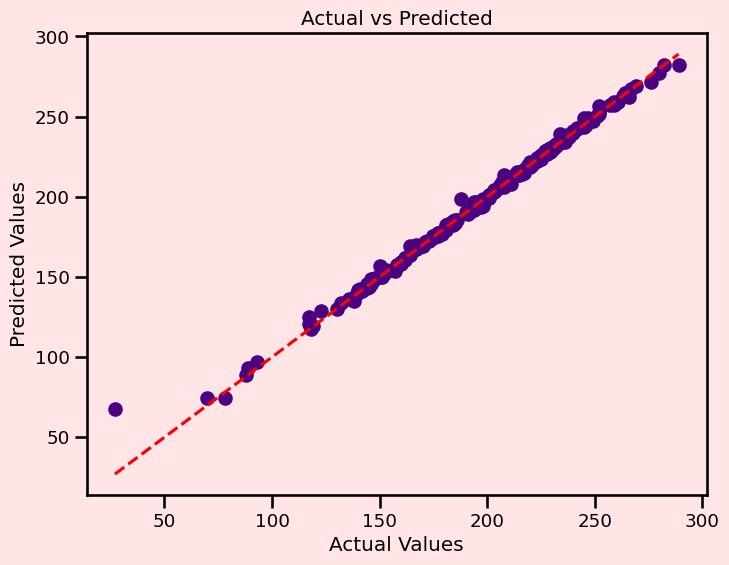

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predrandom, color='indigo')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line (ideal predictions)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Linear Regression Model begins for determining the Total

<b> TRAINING THE LinearRegression MODEL: </b>

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<b> TESTING THE LinearRegression MODEL: </b>

In [50]:
# Predict on the test data
y_predlinear = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predlinear)
r2_linear = r2_score(y_test, y_predlinear)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_linear}')

Mean Squared Error: 1.4068229839349435e-27
R2 Score: 1.0


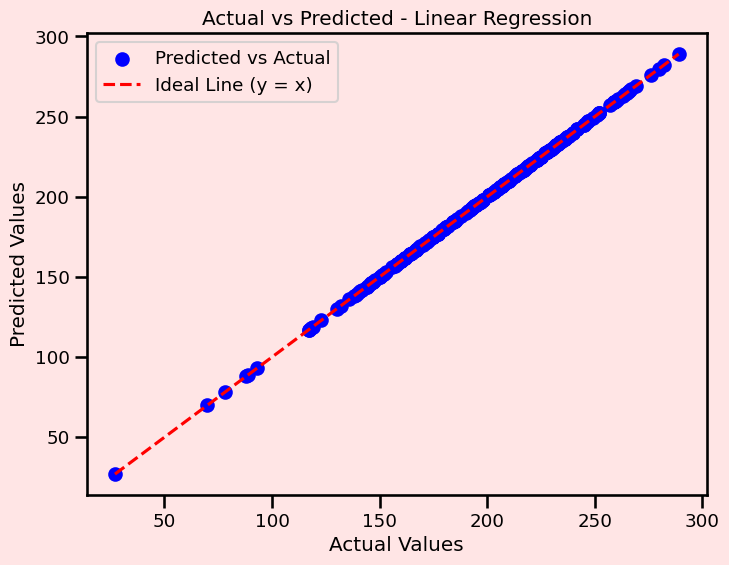

In [51]:
# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predlinear, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line (y = x)')
plt.title('Actual vs Predicted - Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

<b> Observations:</b> <br>
"The Linear Regression model shows an almost negligible Mean Squared Error close to zero, and a perfect R² score of 1.0, indicating <b>flawless accuracy</b> and that the model perfectly fits the data."

### Classification if a student passed or fail using RandomForestClassification based on pre-existing features.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

to_drop_columns = ['Result', 'Competent', 'Percentage', 'Grade','Degree_holder']  # Add or modify columns as needed

# Features and Target
X = df.drop(columns=to_drop_columns)  # Drop 'Result' and 'Competent' (Result is redundant textual data)
y = df['Competent']  # Use the numeric 'Competent' column as the target

# Convert categorical features into numerical form using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



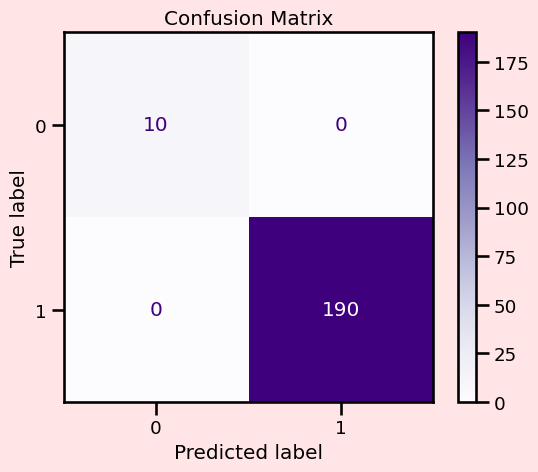

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Purples')  # You can use other colormaps if desired
plt.title("Confusion Matrix")
plt.show()

<b> Observations: </b>
- This is a classic case of overfitting data to me - wherein accuracy is 100% for the 200 rows of test data.<br>
- Model has perfect accuracy on the test set, because of the imbalanced class distribution ,suggesting the model might be biased toward the majority class (pass)

<div style="text-align: center;">
    <img src="img1.jpg" width="400">
</div>